## 2. Karacisim Işıması

1900 yılının Ekim ayında Max Planck'ın güç dağılımı hesabı yayınlanmıştı.

Daha öncesinde Rayleigh Jeans tarafından yapılan elektromanyetik ışımanın güç dağılımı hesabı gözlemlerle uyumsuzdu. Öyle uyumusuzdu ki, "morötesi felaket" olarak anılıyordu. Planck'ın yaptığı hesap gözlemlerle uyumluydu fakat o da bu sefer beklenmeyen bir sonuç getirmişti: Işıma ancak "paketçikler" halinde gerçekleşirse dağılım geçerli oluyordu! Uzatmadan Planck dağılımına bakalım: 

$$ I_{Pl}(\lambda, T)= \frac{2\pi c^2h}{\lambda^5} \frac{1}{(e^{hc/\lambda kT}-1)}$$

Dağılım belli bir sıcaklık için dalgaboyu dağılımı olarak okunabilir. Önemli konuları sonraya bırakarak ilk önce Planck dağılımının grafiğini elde edelim ve anlamaya çalışalım:

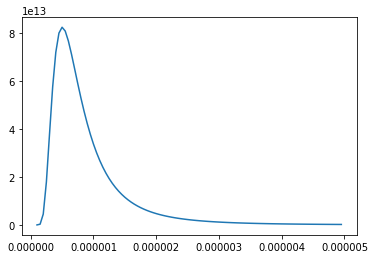

In [1]:
import numpy as nu
import matplotlib.pyplot as mplt

# Sabitler. Tersini belirtmedikçe, bütün sabitler için Review of Particle Physics  
# derlemesini kullanıyorum. http://pdg.lbl.gov/
cc = 299792458              # m/s    Işığın boşluktaki hızı
hh = 6.62607015*10**(-34)   # J⋅s    Planck sabiti
kk = 1.380649*10**(-23)     # J/K    Boltzmann sabiti
qq = 1.602176634*10**(-19)  # C      Elektron yükü
# Matematik sabitler
pp = nu.pi                  # pi sayısı
ee = nu.e                   # e sayısı

# Sıcaklık. İlk önce Güneş yüzeyinin sıcaklığını alalım.
Temp = 5772 # K

# Dalgaboyu, µm. 5 µm'ye kadar, 0.1 µm aralıklarla hesaplayalım.
Lambda = nu.arange(0.1, 5., 0.05)*10**(-6)

#Planck Güç Dağılımı 
PowPlanck = (2*pp*cc**2*hh/Lambda**5)*(1/(ee**(hh*cc/(Lambda*kk*Temp))-1))

#İlk önce Planck dağılımının grafiğini elde edelim:
mplt.plot(Lambda, PowPlanck)

Basitçe grafiğimizi çizdik. Şimdi grafiği daha düzgün ve daha anlaşılır hale getirelim.

Önce eksenler. *x ekseni* **Dalgaboyu** ($\lambda$). Metre cinsinden, bunu µm cinsine çevirelim. 

*y ekseni* **Güç dağılımı** $I_{Pl}(\lambda, T)$. Birimi her dalgaboyunda yayınlanan Güç miktarı (Watt). Bunu yüzey alanından bağımsız hale getirmek için m<sup>2</sup>'ye bölmemiz lazım. Böylece birimimiz Watt/m<sup>2</sup>/µm olur.

Doğru değerlere kavuştuktan sonra eksenlerimizin adlarını ve birimlerini yazabiliriz.

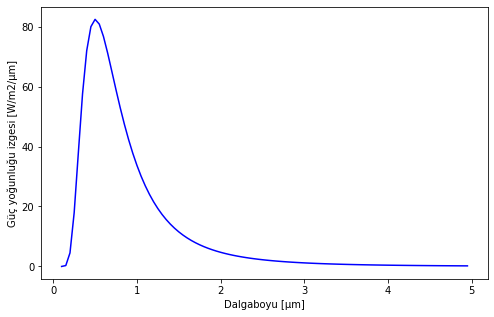

In [2]:
xx = Lambda*10**6                          # x-ekseni, µm olarak
yy = PowPlanck*10**(-12)                   # y-ekseni /m^2

fig, ax = mplt.subplots(figsize=(8, 5))    # Grafiğin büyüklüğü
ax.plot(xx, yy, 'b')                       # Güneş rengini mavi yapalım
ax.set_xlabel('Dalgaboyu [µm]')
ax.set_ylabel('Güç yoğunluğu izgesi [W/m2/µm]')

mplt.show()

Şimdi ikinci adımda farklı sıcaklıklar için dağılımımızı çizelim.



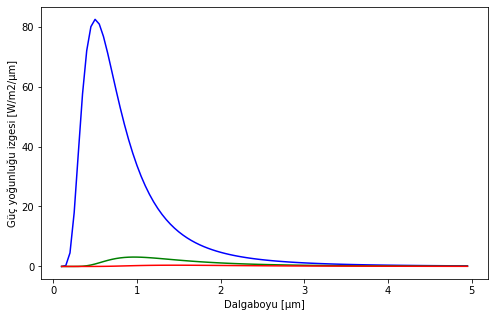

In [3]:
#Birden çok grafik çizeceğimiz için Güç dağıımını bir fonksiyon 
#olarak tanımlamak daha uygun olacaktır. Uygun birimlerle. 

def PlanckDistribution(x):
    Pow = (2*pp*cc**2*hh/Lambda**5)*(1/(ee**(hh*cc/(Lambda*kk*x))-1))*10**(-12)
    return Pow

fig, ax = mplt.subplots(figsize=(8, 5))           # Grafiğin büyüklüğü
ax.set_xlabel('Dalgaboyu [µm]')                   # x-ekseni adı 
ax.set_ylabel('Güç yoğunluğu izgesi [W/m2/µm]')   # y-eksen adı

# Güneş
TT5772 = PlanckDistribution (5772)
mplt.plot(Lambda*10**6, TT5772, 'b')

# T=3000K
TT3000 = PlanckDistribution (3000)
mplt.plot(Lambda*10**6, TT3000, 'g')

# T=2000K
TT2000 = PlanckDistribution (2000)
mplt.plot(Lambda*10**6, TT2000, 'r')

(Yapılacak) Grafiğin Logaritmik gösterimi

### 2.2 Planck "büyüsü"

Planck güç dağılımını gözlemlerle uyumlu bir şekilde hesapladı. 

Planck'ın yaptığı, daha önce Rayleigh Jeans tarafından yapılan klasik hesabı gözlemlerle uyuşturmak için matematik bir yol bulmasıydı. Daha doğrusu daha önce Boltzmann'ın geliştirdiği bir yöntemi uyguladı.O günkü fizikle uyumsuz fakat gözlemlerle uyumlu bir ışıma eğrisini Planck bu şekilde elde etti. 

Daha önce benzerini Lorentz'de görmüştük. **Fizik açısından gerekçesi belli olmayan, sadece gözlemlerle uyumlu hale getirmek için yapılan matematik cambazlıklara o zaman da "büyü" demiştik.** Gelin görün ki, bu büyüler "doğada büyü ve büyücü yoktur" diyen fiziğin temel ön kabuluyle (postüla) çeliştiği için aslında sadece yeni fiziği emreden akıl yürütmelerdi. Bu akıl yürütmenin mantığı temel fizik gerekçeleri yavaş yavaş ortaya çıkacaktı.

Many physicists of the period—including Kirchhoff, Stefan, Boltzmann,
Rubens, Pringsheim, Lummer, Wien, Lord Rayleigh, Jeans, and Planck—had
worked on the problem. It was possible to understand the spectrum both at the
low-frequency end and at the high-frequency end, but no single theory could
account for the entire spectrum.

Rayleigh-Jeans'in klasik elektromanyetik hesabı:
$$I_{Rayyleigh}(\lambda,T)= \frac{2\pi c}{\lambda^4}kT$$


He was applying a technique
invented by Boltzmann, and Planck ultimately expected to take the limit h S 0,
to include all the possibilities. However, he noticed that by keeping h nonzero,
he arrived at the equation needed for I(l, T ):


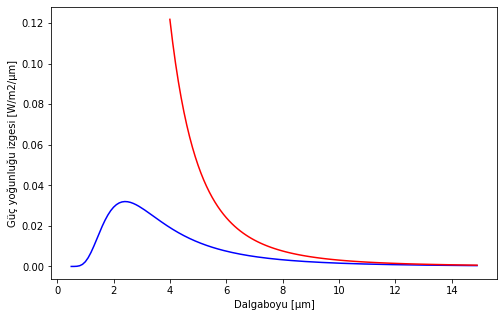

In [21]:
#Birden çok grafik çizeceğimiz için Güç dağıımını bir fonksiyon 
#olarak tanımlamak daha uygun olacaktır. Uygun birimlerle. 

def RayleighDistribution(x):
    Pow = (2*pp*cc/Lambda**4)*kk*x*10**(-12)
    return Pow

fig, ax = mplt.subplots(figsize=(8, 5))    # Grafiğin büyüklüğü
ax.set_xlabel('Dalgaboyu [µm]')
ax.set_ylabel('Güç yoğunluğu izgesi [W/m2/µm]')

# Farklı sıcaklıklar için denemek için sıcaklığı ayrıca tanımlayalım
TT = 1200

# Daha büyük dalgaboylarını görmek için aralığımızı değiştirelim
Lambda = nu.arange(0.5, 15., 0.1)*10**(-6)

# Planck
Pow_Planck = PlanckDistribution (TT)
mplt.plot(Lambda*10**6, Pow_Planck, 'b')

# Ayrıca çok küçük dalgaboylarında Rayleigh dağılımı "morötesi felaket"e
# yol açıcağı için, bundan kaçınalım.
Lambda = nu.arange(4., 15., 0.1)*10**(-6)

# Rayleigh
Pow_Rayleigh = RayleighDistribution (TT)
mplt.plot(Lambda*10**6, Pow_Rayleigh, 'r')


To have feeling about what he has done let's write Planck's radiation in terms of Rayleigh distribution:
$$I_{Pl}=I_{RJ}.\frac{hc/\lambda kT}{e^{hc/\lambda kT}-1}$$
